(807, 14)


(807, 14)

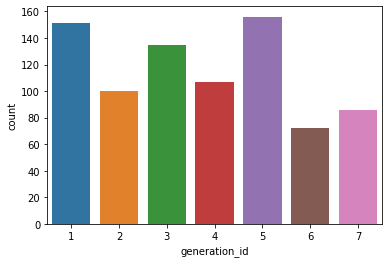

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.countplot(data=pokemon, x='generation_id');
(807, 14)

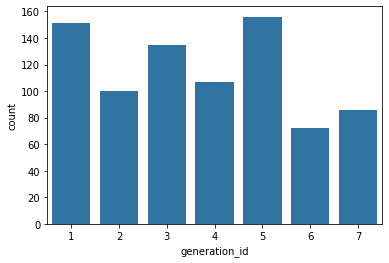

In [2]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);

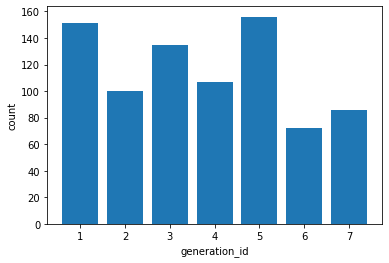

In [3]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

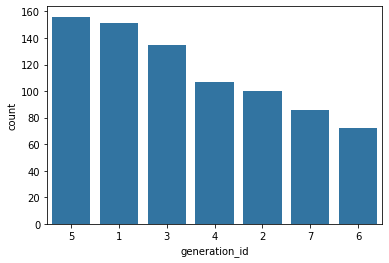

In [4]:
# Static-ordering the bars
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'grass'),
  Text(1, 0, 'fire'),
  Text(2, 0, 'water'),
  Text(3, 0, 'bug'),
  Text(4, 0, 'normal'),
  Text(5, 0, 'poison'),
  Text(6, 0, 'electric'),
  Text(7, 0, 'ground'),
  Text(8, 0, 'fairy'),
  Text(9, 0, 'fighting'),
  Text(10, 0, 'psychic'),
  Text(11, 0, 'rock'),
  Text(12, 0, 'ghost'),
  Text(13, 0, 'ice'),
  Text(14, 0, 'dragon'),
  Text(15, 0, 'dark'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'flying')])

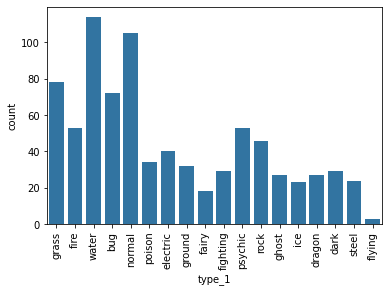

In [5]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

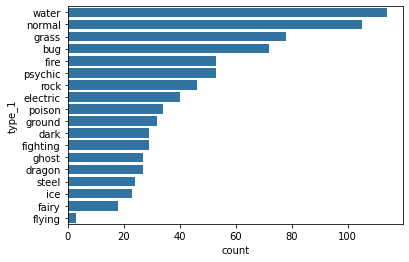

In [6]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

In [7]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(10)
#pkmn_types.shape

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [8]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [9]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

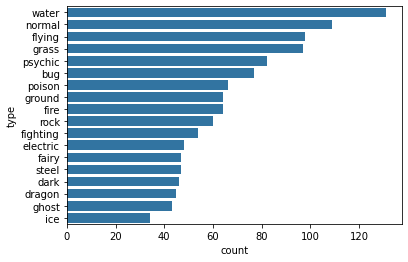

In [10]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

In [11]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [12]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [13]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

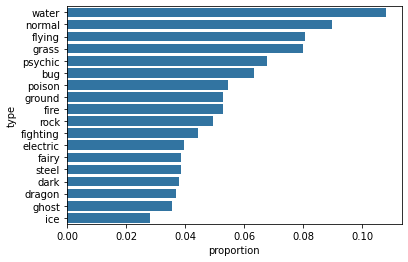

In [14]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

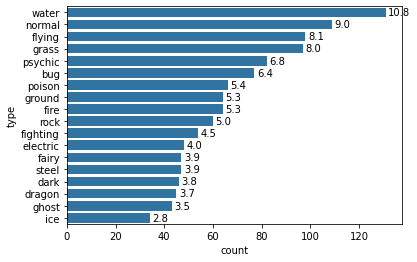

In [15]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

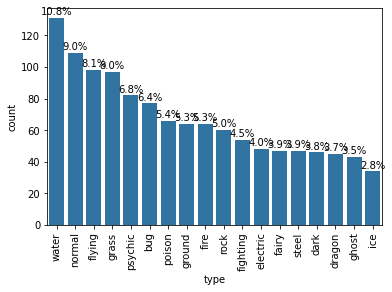

In [16]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

In [17]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

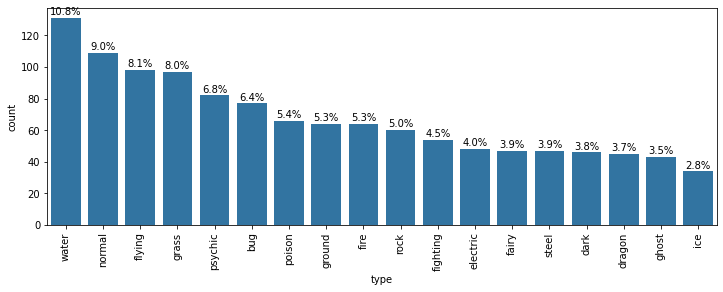

In [18]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

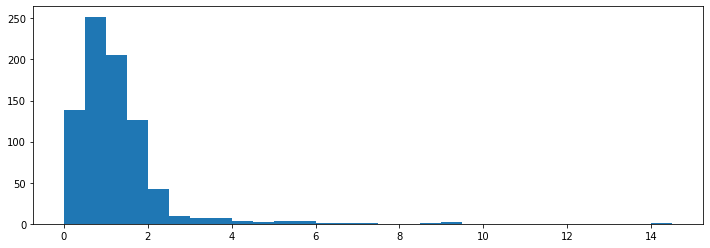

In [19]:

# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

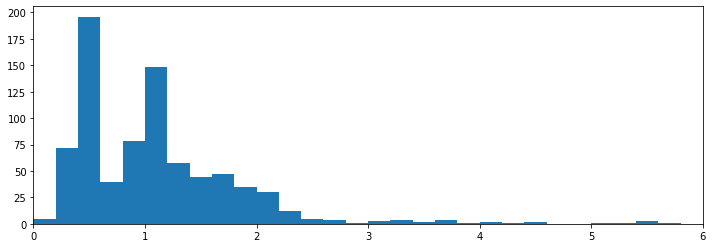

In [20]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,6));

(0.0, 6.0)

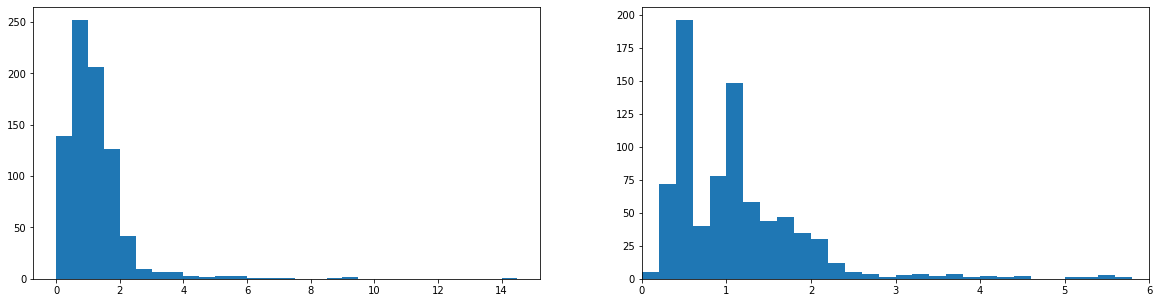

In [24]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
bins = np.arange(0,pokemon['height'].max()+0.5, 0.5)
plt.hist(data= pokemon, x = 'height', bins= bins)

plt.subplot(1,2,2)
bins = np.arange(0,pokemon['height'].max()+0.2, 0.2)
plt.hist(data= pokemon, x = 'height', bins= bins)
plt.xlim(0,6)


Text(0.5, 0, 'The x-axis limits NOT are changed. They are only scaled to log-type')

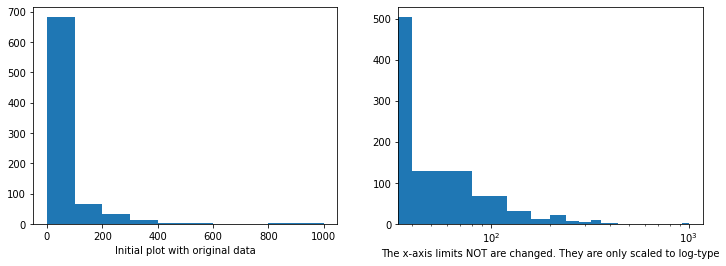

In [25]:
# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)

# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type')

In [26]:
# Describe the data
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [27]:
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

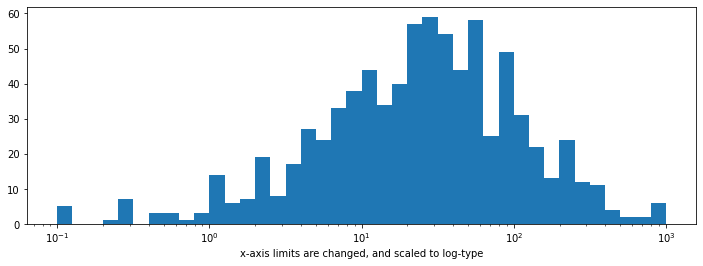

In [28]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')

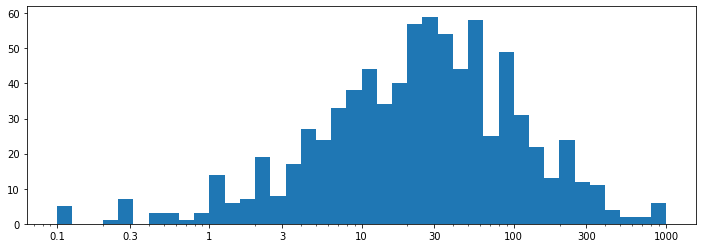

In [29]:

# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

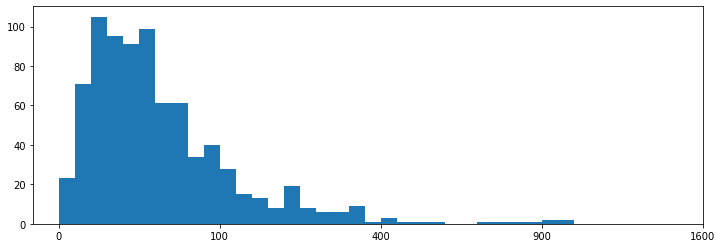

In [30]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));